#### 1. Data Preparation

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import ttest_ind
from tensorflow.python.ops.metrics_impl import root_mean_squared_error
from xgboost.sklearn import xgboost_model_doc

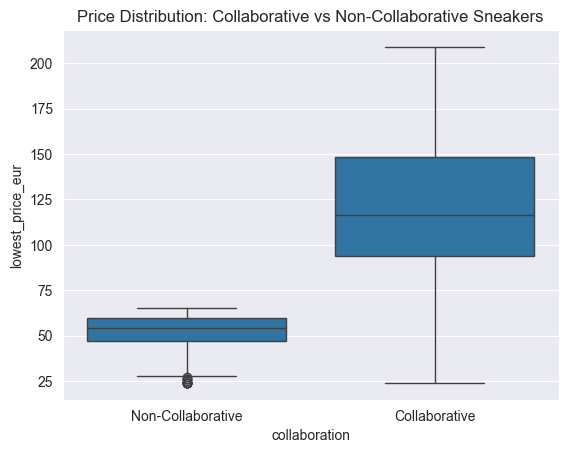

In [33]:
data = pd.read_csv('../more_data.csv')

# Boxplot for price comparison
sns.boxplot(x='collaboration', y='lowest_price_eur', data=data)
plt.xticks([0, 1], ['Non-Collaborative', 'Collaborative'])
plt.title('Price Distribution: Collaborative vs Non-Collaborative Sneakers')
plt.show()


#### 2. Exploratory DATA analysis

	•	H₀ (Null Hypothesis): There is no difference in mean prices between collaborative and non-collaborative sneakers.
	•	H₁ (Alternative Hypothesis): Collaborative sneakers have a different (higher) mean price than non-collaborative sneakers.

In [34]:
# Separate the two groups
collaborative_prices = data[data['collaboration'] == 1]['lowest_price_eur']
non_collaborative_prices = data[data['collaboration'] == 0]['lowest_price_eur']

# Perform t-test
t_stat, p_value = ttest_ind(collaborative_prices, non_collaborative_prices, equal_var=False)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

# Interpret
if p_value < 0.05:
    print("The difference in mean prices is statistically significant.")
else:
    print("No significant difference in mean prices.")

T-Statistic: 47.353039240866515, P-Value: 1.2230335685790398e-230
The difference in mean prices is statistically significant.


#### 3. Model Building

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

data = pd.read_csv('../more_data.csv')

In [37]:
# Features and target variable
X = data[['collaboration']]  # Use only collaboration as the feature
y = data['lowest_price_eur']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
        
    results[name] = {"R²": r2, "RMSE": rmse}

for model, metrics in results.items():
    print(f"{model}: {metrics}")


Linear Regression: {'R²': 0.5812477814410215, 'RMSE': 26.408970316905133}
Random Forest: {'R²': 0.5812506032363371, 'RMSE': 26.408881337275933}
XGBoost: {'R²': 0.5812478065490723, 'RMSE': 26.40896765548728}
